# STAT207 Mini-Project #1 - Analyzing Between Console Sales And Review Scores Based On Different Consoles


Qi Yang

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Introduction

In [2]:
game = pd.read_csv("video_games.csv")

In the game industry, understanding the factors influencing a game's success is important. The project aims to find out the relationship between "Metrics.Review Score" and "Metrics.Sales," and a categorical variable, "Release.Console."

This analysis intends to discover patterns, correlations, and potential dependencies among these variables, reviewing a direct perspective on the relationship and influence between review scores, sales, and the gaming console landscape. Through visualizations and statistical analysis, we want to help people who engage in the game industry uncover insights that can guide strategic decisions in game development and marketing. The result of the project could help related people change their strategy based on the review score to promote the sale of each console.

## 2. Dataset Discussion

The video game dataset, originally collected by Dr. Joe Cox, comprises information on the sales and playtime of over a thousand video games released between 2004 and 2010. This dataset also integrates playtime details sourced from the crowd-sourced platform "How Long to Beat." I, Qi Yang, downloaded this data from the canvas page on 08/02/2024. The rows in this dataset represent individual video games, with each observation including data related to a specific game's relevant metrics. The dataset's collection method is important for understanding each game's reliability, and the inclusion of each individual playtime data adds a unique dimension. The dataset's scope would be a great inclusion of aspects that are related to the project. It includes every potential variable that is worth discussing in future discovery. The three key variables for the project—The "Metrics.Review Score" includes the critical evaluation of games, providing insights into their qualitative reception among players. The "Metrics.Sales" variable shows the commercial success of each game, reflecting the economic impact in the gaming market. The "Release.Console" categorical variable introduces the dimension of gaming platforms, highlighting the varied ecosystems where these games unfold.

In [37]:
game = pd.read_csv("video_games.csv")
game.head(5)
len(game)

1212

## 3. Dataset Cleaning

In [36]:
new = game[["Metrics.Review Score","Metrics.Sales","Release.Console"]]
new.isnull().sum()

Metrics.Review Score    0
Metrics.Sales           0
Release.Console         0
dtype: int64

In [38]:
new_drop = new.dropna()
len(new)-len(new_drop)

0

The pros are make sure the completeness of the entire dataset and to increase the accuracy of the entire data. The cons are these acts may lead to missing of the valuable information and biased result. 

In [39]:
new_drop.duplicated().sum()

56

In [40]:
new_clean = new_drop.drop_duplicates()
len(new_drop)-len(new_clean)

56

134

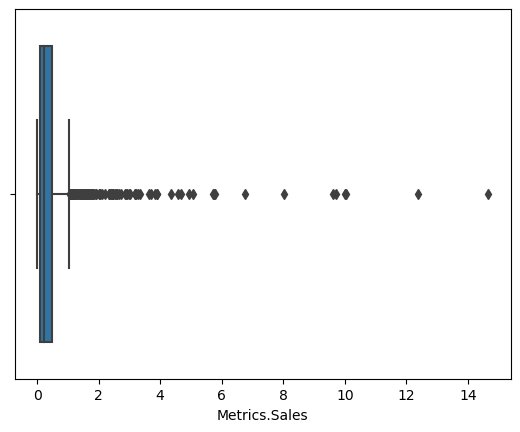

In [52]:
sns.boxplot(x=new_clean['Metrics.Sales'])
Q1 = new_clean[['Metrics.Sales', 'Metrics.Review Score']].quantile(0.25)
Q3 = new_clean[['Metrics.Sales', 'Metrics.Review Score']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_clean1 = new_clean[((new_clean[['Metrics.Sales','Metrics.Review Score']] >= lower_bound) & (new_clean[['Metrics.Sales','Metrics.Review Score']] <= upper_bound)).all(axis=1)]
len(new_clean)-len(new_clean1)


<Axes: xlabel='Metrics.Review Score'>

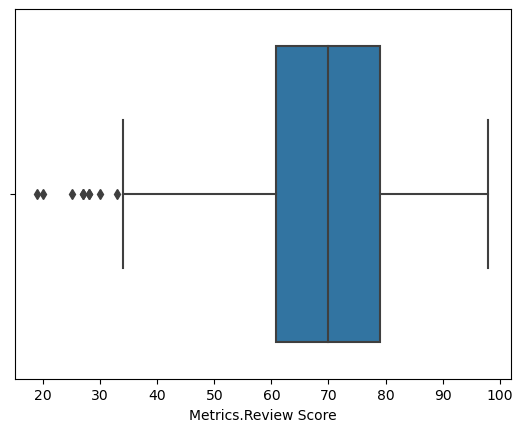

In [54]:
sns.boxplot(x=new_clean['Metrics.Review Score'])


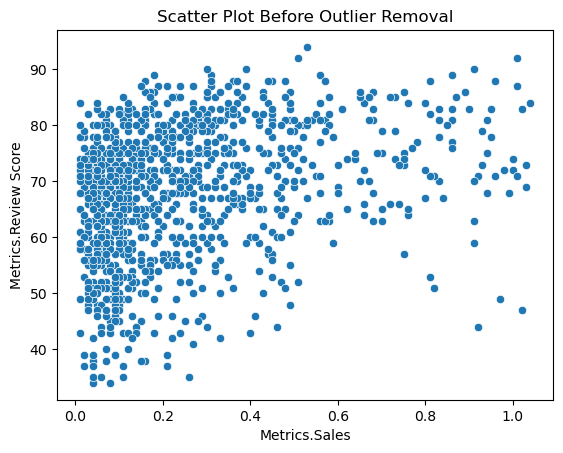

3

In [55]:
sns.scatterplot(x='Metrics.Sales', y='Metrics.Review Score', data=new_clean1)
plt.title('Scatter Plot Before Outlier Removal')
plt.show()


To clean the data, I first select "Metrics.Review Score", "Metrics.Sales", "Release.Console" as my new data frame for the project. Since there is no explicit or implicit missing value in these three columns, I then want to eliminate the duplicates in the new data frame called "new" because I want to ensure the accuracy of the data. After that, I need to clear the outliers from the dataset. From the two boxplots above, I choose to clear the data that are outside the IQR. The pros of the cleaning method are that we can delete many significant points that will influence the result. However, some information may be missed. Therefore, for the scatterplot above, we can find out there is no significant outlier that will influence the overall data for the result. 

## 4. <u>Research Question</u>: How does the Relationship between `x` and `y` Change based on Different Values of `z` in the Dataset?

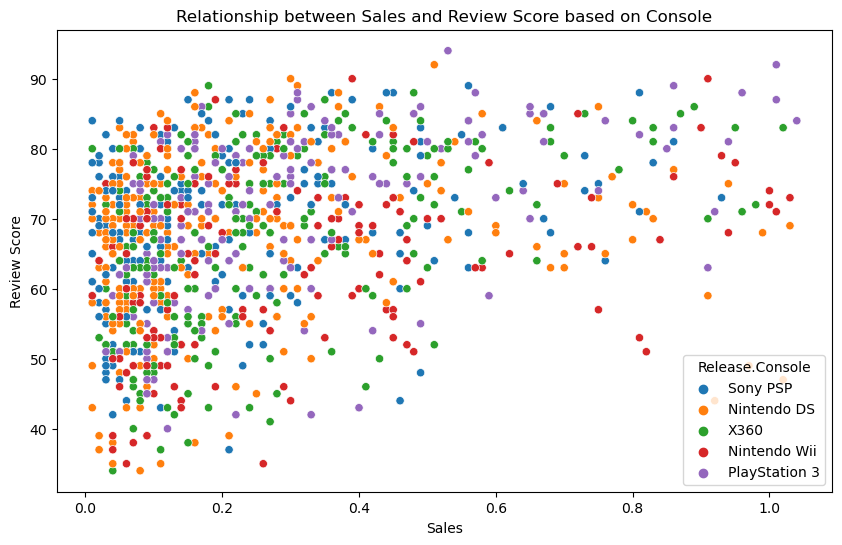

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_clean1, x='Metrics.Sales', y='Metrics.Review Score', hue='Release.Console')
plt.title('Relationship between Sales and Review Score based on Console')
plt.xlabel('Sales')
plt.ylabel('Review Score')
plt.show()

In [58]:
correlation_matrix = new_clean1[["Metrics.Review Score","Metrics.Sales","Release.Console"]].groupby("Release.Console").corr()
correlation_matrix

Metrics.Review Score  Metrics.Sales
Release.Console                                                          
Nintendo DS     Metrics.Review Score              1.000000       0.171603
                Metrics.Sales                     0.171603       1.000000
Nintendo Wii    Metrics.Review Score              1.000000       0.324338
                Metrics.Sales                     0.324338       1.000000
PlayStation 3   Metrics.Review Score              1.000000       0.486642
                Metrics.Sales                     0.486642       1.000000
Sony PSP        Metrics.Review Score              1.000000       0.301673
                Metrics.Sales                     0.301673       1.000000
X360            Metrics.Review Score              1.000000       0.438121
                Metrics.Sales                     0.438121       1.000000

/Users/youngyq/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


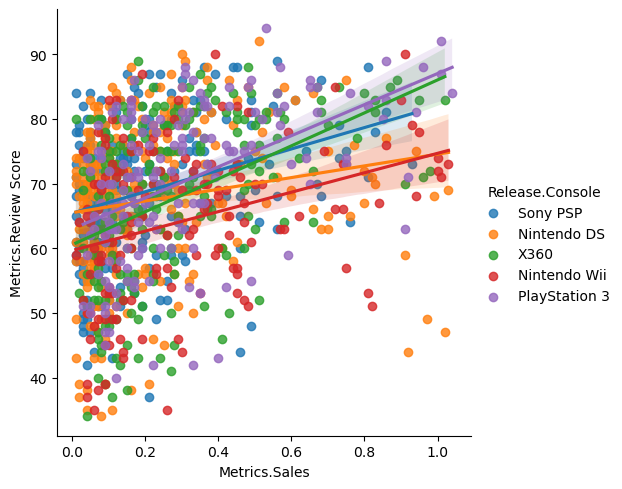

In [59]:
sns.lmplot(data=new_clean1, x='Metrics.Sales', y='Metrics.Review Score', hue='Release.Console')
plt.show()

1. Comparing Direction: The relationship between sales and review score for all Console is positive.
2. Comparing Shape: The relationship between sales and review score for all Console is linear.
3. Comparing Strength: The strength of the relationship betweensales and review score for all Console is not strong. With the play station 3 exhibits the strongest linear relationship (0.4866) vs. the Nintendo DS exhibiting the weakest linear relationship (0.1716).
4. Comparing Ouliers: After cleaning, none of the coffee colors have strong outliers in this dataset.
5. Comparing Slope: The relationship between  sales and review score for playstation 3 is the steepest among all the console while Nintendo DS have the least steepest. 

## 5. Conclusion

In summary, the analysis of the relationship between sales and review scores based on game consoles reveals several key findings. Firstly, there is a positive correlation between sales and review scores for all consoles, indicating that higher review scores tend to correspond with increased sales. The relationship is linear, and while the strength of this association is not considered strong overall, notable variations exist among individual consoles. The PlayStation 3 demonstrates the strongest linear relationship, while the Nintendo DS exhibits the weakest. The absence of strong outliers post-cleaning suggests a relatively stable dataset. Additionally, the comparison of slopes highlights that the relationship is steepest for the PlayStation 3 and least steep for the Nintendo DS. However, there is still a shortcoming for this research. The relationship between the sales and review scores based on consoles is not strong and therefore, it is hard for the gaming industry to rely on this research on their strategies on how to promote the overall sales. Perhaps in the future, we need to do background research first to find out what may be the most related variables that could be conducted to figure out the strongest correlation with sales . 
